# Navigating Short Stories

In this notebook, we explain how to use Mappa Mundi (MM) to do causal DEFT (DAG extraction from text)
using as a test case, the following 3 short stories by P.G. Wodehouse.

* [Bill the Bloodhound](../short_stories/bill-the-bloodhound.txt)
* [Extricating Young Gussie](../short_stories/extricating-young-gussie.txt)
* [Wilton's Holiday](../short_stories/wiltons-holiday.txt)


In [1]:
# set this to True if running on Google Colab
COLAB = True

In [2]:
# this is necessary iff running on Colab for first time
if COLAB:
    !git clone https://github.com/rrtucci/mappa_mundi.git
    %cd mappa_mundi/
    !pip install -r requirements.txt

Cloning into 'mappa_mundi'...
remote: Enumerating objects: 939, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 939 (delta 94), reused 107 (delta 51), pack-reused 774
Receiving objects: 100% (939/939), 7.84 MiB | 18.25 MiB/s, done.
Resolving deltas: 100% (591/591), done.
/content/mappa_mundi
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.6 MB/s eta 0:00:00


In [3]:
# this makes sure it starts looking for things from the project folder down.

import os
import sys
if not COLAB:
    os.chdir('../')
else:
    os.chdir('/content/mappa_mundi')
    # kaggle
    # os.chdir('/kaggle/working/mappa_mundi')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

/content/mappa_mundi


In [4]:
from utils import *
print_welcome_message()

Welcome Causal AI Navigator. We have been waiting for you for millennia. Where would you like us to go next?


## Global variables
All the global variables used by Mappa Mundi are defined in this file.
Change with caution.


[my_globals.py](../my_globals.py)

## Originals

Here is the original form of the 3 short stories, in the form they were downloaded
from the Project Gutenberg website.

* [Bill the Bloodhound](../short_stories/bill-the-bloodhound.txt)
* [Extricating Young Gussie](../short_stories/extricating-young-gussie.txt)
* [Wilton's Holiday](../short_stories/wiltons-holiday.txt)

## Cleaning

The results of the following step can be found in the **short_stories_clean**
directory.


* [Bill the Bloodhound (clean)](../short_stories_clean/bill-the-bloodhound.txt)
* [Extricating Young Gussie (clean)](../short_stories_clean/extricating-young-gussie.txt)
* [Wilton's Holiday (clean)](../short_stories_clean/wiltons-holiday.txt)

In [5]:
from cleaning import *

in_dir = "short_stories"
out_dir = "short_stories_clean"
batch_file_names = ["bill-the-bloodhound.txt", "extricating-young-gussie.txt", "wiltons-holiday.txt"]
clean_batch_of_m_scripts(
    in_dir, out_dir,
    batch_file_names,
    remove_dialog=False)

1.
fetching bill-the-bloodhound.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []
2.
fetching extricating-young-gussie.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []
3.
fetching wiltons-holiday.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []


## Spell-checking

The results of the following step can be found in the **short_stories_spell** directory

* [Bill the Bloodhound (spell)](../short_stories_spell/bill-the-bloodhound.txt)
* [Extricating Young Gussie (spell)](../short_stories_spell/extricating-young-gussie.txt)
* [Wilton's Holiday (spell)](../short_stories_spell/wiltons-holiday.txt)

In [6]:
from spell_checking import *
use_local_dict=True
error_type = "all"

print("use_local_dict=", use_local_dict)
print("error_type=", error_type)
print("SPELLING_CORRECTION_RISK=", SPELLING_CORRECTION_RISK)
print()

in_dir = "short_stories_clean"
out_dir = "short_stories_spell"
batch_file_names = my_listdir(in_dir)
correct_this_batch_of_files(in_dir,
                            out_dir,
                            batch_file_names,
                            error_type= error_type,
                            verbose=False,
                            use_local_dict=use_local_dict)

use_local_dict= True
error_type= all
SPELLING_CORRECTION_RISK= 1e-08

1.
bill-the-bloodhound.txt
all changes: [('lookin', 'looking')]
2.
extricating-young-gussie.txt
all changes: [('jove', 'joe'), ('deepo', 'deep')]
3.
wiltons-holiday.txt
all changes: []


## Simplifying

The results of the following step can be found in the **short_stories_simp** directory

* [Bill the Bloodhound (simp)](../short_stories_simp/bill-the-bloodhound.txt)
* [Extricating Young Gussie (simp)](../short_stories_simp/extricating-young-gussie.txt)
* [Wilton's Holiday (simp)](../short_stories_simp/wiltons-holiday.txt)


In [7]:
# from simplifying import *

# in_dir = "short_stories_spell"
# out_dir = "short_stories_simp"
# batch_file_names = my_listdir(in_dir)[0:3]
# simplify_batch_of_m_scripts(
#     in_dir, out_dir,
#     batch_file_names,
#     verbose=False)

Open the following jupyter notebook in your Google Colab account and run it

https://colab.research.google.com/drive/1S2EWOGkoCgjfOJzTRJ7PLeu4T8SBwhlF?usp=sharing

Then download the resulting simplified short stories to the folder `short_stories_simp`.
We have done this for you in the Mappa_Mundi repo for 3 P.G.Wodehouse short stories.

## Post Cleaning

The results of the following step can be found in the **short_stories_post_clean** directory

* [Bill the Bloodhound (post-clean)](../short_stories_post_clean/bill-the-bloodhound.txt)
* [Extricating Young Gussie (post-clean)](../short_stories_post_clean/extricating-young-gussie.txt)
* [Wilton's Holiday (post-clean)](../short_stories_post_clean/wiltons-holiday.txt)


In [8]:
from post_cleaning import *
in_dir = "short_stories_simp"
out_dir = "short_stories_post_clean"
batch_file_names = my_listdir(in_dir)[0:3]
post_clean_batch_of_m_scripts(
    in_dir, out_dir,
    batch_file_names,
    verbose=False)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


1. bill-the-bloodhound.txt
2. extricating-young-gussie.txt
3. wiltons-holiday.txt


## DAG Atlas creation


The results of the following step can be found in the **short_stories_dag_atlas** directory. They are 3 pickled
files, one for each of the 3 short stories. They will be opened in the next step.

In [9]:
print(SIMI_THRESHOLD)

2


In [10]:
from DagAtlas import *

simp_dir = "short_stories_post_clean"
dag_dir = "short_stories_dag_atlas"
atlas = DagAtlas(simp_dir, dag_dir)
all_titles = [file_name[:-len(".txt")] \
              for file_name in my_listdir(simp_dir)]
atlas.update_arrows_in_batch_of_m_scripts(
    batch_titles=all_titles[0:3])

Initiating DagAtlas object: 0.00 minutes



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Starting comparison of 2 titles: 0.16 minutes
title1 and its num of nodes: bill-the-bloodhound 594
title2 and its num of nodes: extricating-young-gussie 736
product of numbers of nodes= 437184
Starting bridges: 0.16 minutes
1 bridges
2 bridges
3 bridges
4 bridges
5 bridges
6 bridges
7 bridges
8 bridges
9 bridges
10 bridges
11 bridges
12 bridges
13 bridges
14 bridges
15 bridges
16 bridges
17 bridges
18 bridges
Before saving 2 dags: 0.35 minutes
Exiting 2 titles comparison: 0.35 minutes

Starting comparison of 2 titles: 0.35 minutes
title1 and its num of nodes: bill-the-bloodhound 594
title2 and its num of nodes: wiltons-holiday 466
product of numbers of nodes= 276804
Starting bridges: 0.35 minutes
1 bridges
2 bridges
3 bridges
4 bridges
5 bridges
6 bridges
7 bridges
8 bridges
9 bridges
10 bridges
Before saving 2 dags: 0.45 minutes
Exiting 2 titles comparison: 0.45 minutes

Starting comparison of 2 titles: 0.45 minutes
title1 and its num of nodes: extricating-young-gussie 736
title2 and 

## Visualizing

In the following step, we a draw DAG for each of the 3 short stories, based on the
pickled files in the **short_stories_dag_atlas** directory.
We do this for 2 arrow repetition thresholds: 3, 4.

In [11]:
from Dag import *

def visualize_all_dags(prob_acc_thold, nsam_thold, draw):

    dag_dir = "short_stories_dag_atlas"
    simp_dir = "short_stories_simp"
    clean_dir = "short_stories_clean"
    file_names = [file_name for
                  file_name in my_listdir(dag_dir)[0:3]]
    dags = []
    for fname in file_names:
        path = dag_dir + "/" + fname
        with open(path, "rb") as f:
            dag = pik.load(f)
            dags.append(dag)
    for dag in dags:
        print("-------------------------")
        print(dag.m_title)
        hprobs_arrows = dag.build_high_prob_acc_arrows(
            prob_acc_thold, nsam_thold)
        print({arrow_str(arrow):dag.arrow_to_acc_rej_nums[arrow] \
               for arrow in hprobs_arrows})
        print()
        if draw:
            dag.draw(prob_acc_thold, nsam_thold, jupyter=True)
            dag.print_map_legend(clean_dir, simp_dir, prob_acc_thold, nsam_thold)

-------------------------
bill-the-bloodhound
{'(13,1)->(357,0)': [4, 0]}



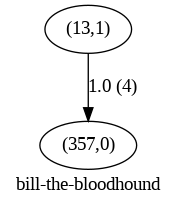

MAP LEGEND
title: bill-the-bloodhound
prob of acceptance threshold: 0.9
number of samples threshold: 4
number of arrows shown: 1
number of arrows dropped: 154
(13,1):
(FULL) She was small and quiet, and rather pretty.
(PART) She was small .
(357,0):
(FULL) He clutched at her.
(PART) He clutched at her .
-------------------------
extricating-young-gussie
{'(292,0)->(511,0)': [4, 0], '(292,0)->(529,0)': [6, 0], '(292,1)->(529,0)': [4, 0], '(511,0)->(529,0)': [4, 0]}



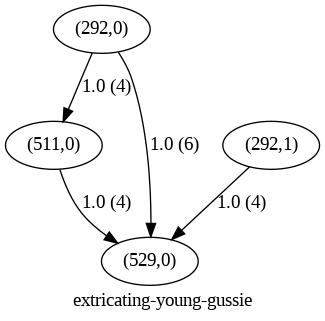

MAP LEGEND
title: extricating-young-gussie
prob of acceptance threshold: 0.9
number of samples threshold: 4
number of arrows shown: 4
number of arrows dropped: 129
(292,0):
(FULL) She was rather small, with great big eyes and a ripping smile.
(PART) She was rather small , with great big eyes .
(292,1):
(FULL) She was rather small, with great big eyes and a ripping smile.
(PART) She was rather small , with a ripping smile .
(511,0):
(FULL) she said.
(PART) she said .
(529,0):
(FULL) 'He was sitting hand in hand with her.'
(PART) ' He was sitting hand in hand with her '
-------------------------
wiltons-holiday
{'(49,0)->(266,1)': [5, 0]}



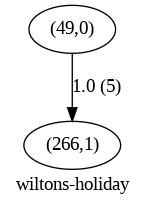

MAP LEGEND
title: wiltons-holiday
prob of acceptance threshold: 0.9
number of samples threshold: 4
number of arrows shown: 1
number of arrows dropped: 58
(49,0):
(FULL) She was small and, to my mind, insignificant.
(PART) She was small .
(266,1):
(FULL) She came to him as a little child comes to its mother, and he put his arm around her.
(PART) he put his arm around her .


In [12]:
visualize_all_dags(prob_acc_thold=.9, nsam_thold=4, draw=True)

-------------------------
bill-the-bloodhound
{'(13,1)->(357,0)': [4, 0]}



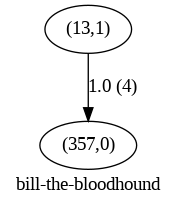

MAP LEGEND
title: bill-the-bloodhound
prob of acceptance threshold: 0.9
number of samples threshold: 3
number of arrows shown: 1
number of arrows dropped: 154
(13,1):
(FULL) She was small and quiet, and rather pretty.
(PART) She was small .
(357,0):
(FULL) He clutched at her.
(PART) He clutched at her .
-------------------------
extricating-young-gussie
{'(292,0)->(511,0)': [4, 0], '(292,0)->(529,0)': [6, 0], '(292,1)->(529,0)': [4, 0], '(511,0)->(529,0)': [4, 0]}



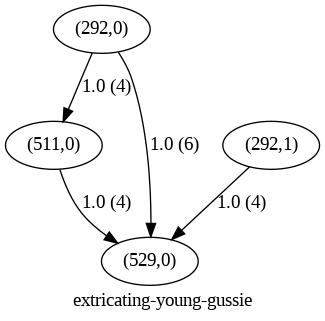

MAP LEGEND
title: extricating-young-gussie
prob of acceptance threshold: 0.9
number of samples threshold: 3
number of arrows shown: 4
number of arrows dropped: 129
(292,0):
(FULL) She was rather small, with great big eyes and a ripping smile.
(PART) She was rather small , with great big eyes .
(292,1):
(FULL) She was rather small, with great big eyes and a ripping smile.
(PART) She was rather small , with a ripping smile .
(511,0):
(FULL) she said.
(PART) she said .
(529,0):
(FULL) 'He was sitting hand in hand with her.'
(PART) ' He was sitting hand in hand with her '
-------------------------
wiltons-holiday
{'(49,0)->(266,1)': [5, 0]}



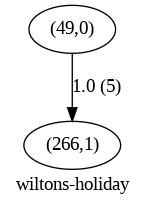

MAP LEGEND
title: wiltons-holiday
prob of acceptance threshold: 0.9
number of samples threshold: 3
number of arrows shown: 1
number of arrows dropped: 58
(49,0):
(FULL) She was small and, to my mind, insignificant.
(PART) She was small .
(266,1):
(FULL) She came to him as a little child comes to its mother, and he put his arm around her.
(PART) he put his arm around her .


In [13]:
visualize_all_dags(prob_acc_thold=.9, nsam_thold=3, draw=True)

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
%%bash
zip -r short_stories_dag_atlas.zip short_stories_dag_atlas

  adding: short_stories_dag_atlas/ (stored 0%)
  adding: short_stories_dag_atlas/extricating-young-gussie.pkl (deflated 84%)
  adding: short_stories_dag_atlas/wiltons-holiday.pkl (deflated 84%)
  adding: short_stories_dag_atlas/bill-the-bloodhound.pkl (deflated 83%)
